In [1]:
# алгоритм для расширения стенок

import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.spatial.distance as dist
import image_processing as ip

import scipy.misc
import numpy as np
from skimage.draw import line_aa

ip.get_contour_of_image('plann')
img = cv2.imread('out_pics/binary_plann.png')

ModuleNotFoundError: No module named 'cv2'

In [ ]:
# делаем трехканальное изображение одноканальным, и формируем массив из 0 и 1

# вводим количество пикселей, по которым будем усреднять
h_x = 10
h_y = 10

iimg = np.mean(img, axis=2)
print(iimg)

l_y, l_x = np.shape(iimg)

print(l_y, l_x)

img_c = np.ones( (l_y // h_y, l_x // h_x) )
print( np.shape( img_c) )

for iy, ix in np.ndindex(img_c.shape):
    color = np.mean(iimg[iy * h_y : iy * h_y + h_y, ix * h_x : ix * h_x + h_x])
    if color < 255 * 0.9 * (1 - h_x / l_x):
        img_c[iy, ix] = 1
    else:
        img_c[iy, ix] = 0

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
569 759
(56, 75)


In [ ]:
np.save('plann_c1', img_c)

from PIL import Image
im = Image.fromarray(img_c * 1., "L")
im.save("img_c.png")

In [ ]:
#coords = ip.find_coords_of_exits('plann')

#coords = [(20,140)]

#print(coords)
coords_rescaled = (coords / np.array( [[h_x, h_y]] ) ).astype(int)
coords_rescaled =[(70,10)]

print(coords_rescaled)
coords_rescaled = np.transpose( coords_rescaled )
print(coords_rescaled)

[(70, 10)]
[[70]
 [10]]


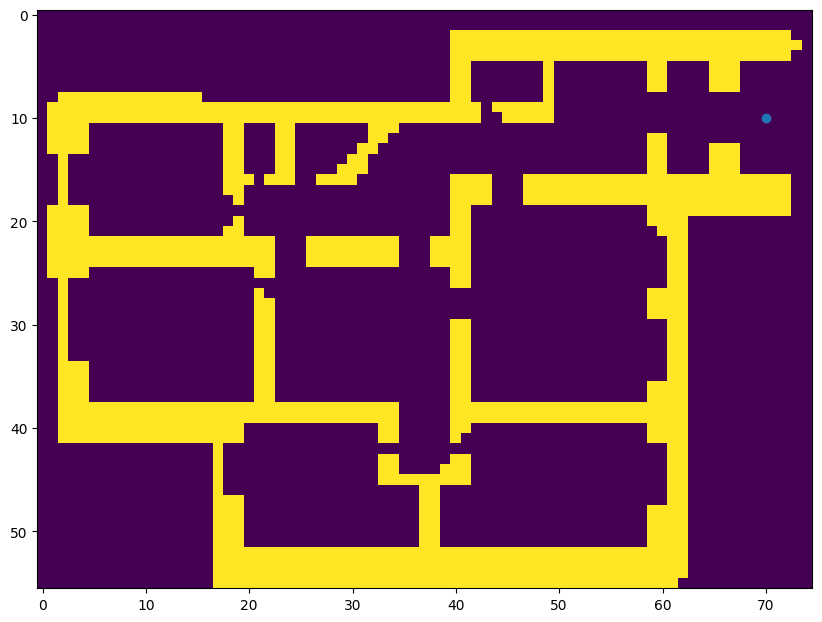

0.0


In [ ]:
# выводим размытое изображение

plt.figure(figsize=(10,8))
plt.imshow(img_c)
plt.scatter(coords_rescaled[0], coords_rescaled[1])
plt.show()

print(img_c[1,1])

In [ ]:
import itertools

# найти множество индексов соседних элементов в двумерном массиве
def get_neighbours(arr, ind):
    l1, l2 = np.shape(arr)

    #print(l1, l2)

    # вычисляем границы

    i_min = max(0, ind[0] - 1)
    i_max = min(l1 - 1, ind[0] + 1)

    j_min = max(0, ind[1] - 1)
    j_max = min(l2 - 1, ind[1] + 1)

    # получаем множество индексов соседей

    #return np.mgrid([i_min: (i_max + 1) : 1], [j_min: (j_max + 1) : 1])

    return list ( itertools.product( range(i_min, i_max + 1, 1), range(j_min,  (j_max + 1), 1) ) )


In [ ]:
# N - число итераций раздутия
# img - картинка из 0 и 1
def blow_job(img, N):
    #print(get_neighbours(iimg, [175,5]))
    count = 0
    for i in range(N):

        indices = np.argwhere(img > 0)
        #print(indices)
        # получаем индексы стенок
        for i_y, i_x in indices:

            # получаем всех соседей
            neighb_ind = get_neighbours(img, [i_y, i_x])
            #print(neighb_ind)
            #print([img[s] for s in neighb_ind])
            # обходим всех соседей
            for k, l in neighb_ind:
                #if (k, l) in indices:
                #    continue
                    # уже черную вершину не проверяем

                # флаг необходимости окраски
                to_be_black = False

                # если среди новых соседей данного соседа первоначального элемента
                # уже есть черные клетки, его не закрашиваем
                #print( k, l )

                ind = list(set(  get_neighbours(img, [k, l]) ).difference(set(neighb_ind) ) )
                #print(ind)
                neighb_colors = [img[s] for s in ind]
                #print(neighb_colors)
                if (not (1 in neighb_colors)):
                    to_be_black = True
                    #print("True!")
                if to_be_black:
                    img[k,l] = 1
                    count += 1
    return img

In [ ]:
img_c = blow_job(img_c, 3)

In [ ]:
def add_doors(img, coords):
    # функция добавления дверей. Рисуем прямую до ближайшей свободной точки

    indices = np.argwhere(img == 0)
    for coord in coords:
        #print(coord - indices)
        distances = np.linalg.norm( np.flip(coord) - indices, axis = 1)
        distances = np.array(distances)
        #print(np.min(distances))
        nearest_el = indices[np.argmin(distances)]
        #print(nearest_el)
        #print()

        # находим индексы ближайшего элемента

        rr, cc, val = line_aa(coord[1], coord[0], nearest_el[0], nearest_el[1])
        # рисуем отсутствие стенки
        img[rr, cc] = 0

    return img

In [ ]:
img_wdoors = add_doors(img_c, np.transpose(coords_rescaled) )

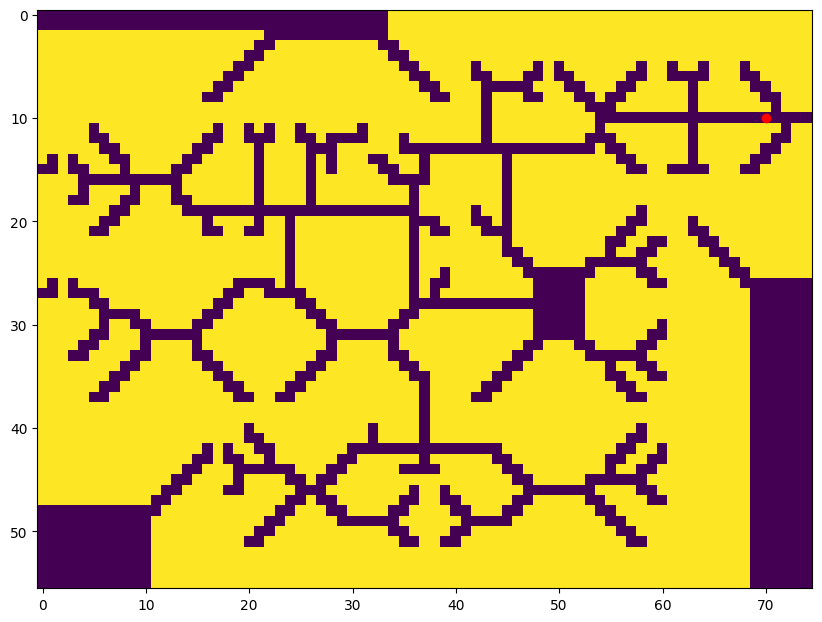

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(img_wdoors)
plt.scatter(coords_rescaled[0], coords_rescaled[1],color = "red")
plt.show()

In [ ]:
np.save('plann_c', img_wdoors)

In [ ]:
!python3 hack.py

Figure(640x480)
0
100
200
MovieWriter imagemagick unavailable; using Pillow instead.
